In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\Sreeram Krishnaswamy\Downloads\Analytics\GKSweeping.csv')

In [6]:
df.head()

,Rk,Player,Squad,90s,40+YardsComp,40+YardsAtt,40>Yards,AvgLen,OPA,Perc,OPA/90
0,83,Manuel Neuer\8778c910,Bayern Munich,20.0,118.0,203.0,774.0,30.3,35.0,58.128079,1.750000
1,1,Manuel Riemann\9f941969,Bochum,20.0,346.0,749.0,893.0,49.7,34.0,46.194927,1.700000
2,13,Nick Pope\4b40d9ca,Burnley,18.0,162.0,416.0,375.0,53.8,27.0,38.942308,1.500000
3,59,David Raya\98ea5115,Brentford,10.0,95.0,256.0,372.0,42.7,15.0,37.109375,1.500000
4,92,Alisson\7a2e46a8,Liverpool,21.0,88.0,180.0,634.0,30.2,28.0,48.888889,1.333333


In [7]:
df['Player']=df['Player'].str.split('\\',expand=True)[0]
df.head()

,Rk,Player,Squad,90s,40+YardsComp,40+YardsAtt,40>Yards,AvgLen,OPA,Perc,OPA/90
0,83,Manuel Neuer,Bayern Munich,20.0,118.0,203.0,774.0,30.3,35.0,58.128079,1.750000
1,1,Manuel Riemann,Bochum,20.0,346.0,749.0,893.0,49.7,34.0,46.194927,1.700000
2,13,Nick Pope,Burnley,18.0,162.0,416.0,375.0,53.8,27.0,38.942308,1.500000
3,59,David Raya,Brentford,10.0,95.0,256.0,372.0,42.7,15.0,37.109375,1.500000
4,92,Alisson,Liverpool,21.0,88.0,180.0,634.0,30.2,28.0,48.888889,1.333333


In [8]:
opa=list(df['OPA/90'])
per=list(df['Perc'])
player=list(df['Player'])

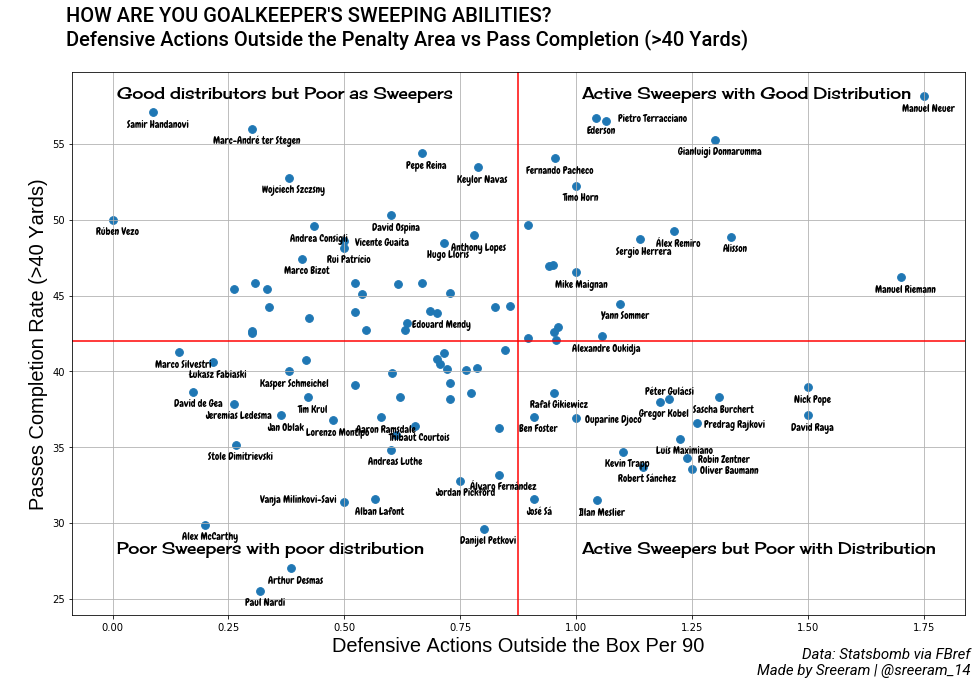

In [12]:
df.plot.scatter('OPA/90','Perc',  s=60, figsize=(16,10))

TITLE1="HOW ARE YOU GOALKEEPER'S SWEEPING ABILITIES?"
TITLE2="Defensive Actions Outside the Penalty Area vs Pass Completion (>40 Yards)"
#plt.title('Defensive Actions vs Successful Launches\nBig 5 European Leagues | 2021/22\n', fontsize=25,fontproperties=font_bold.prop,color="#000000",ha="right")
plt.text(
    -.1, 60, f"{TITLE1}\n{TITLE2}\n", size=20,
    color="#000000",
    fontproperties=font_bold.prop,
    ha="left"
)     

plt.xlabel("Defensive Actions Outside the Box Per 90",fontsize=20,fontproperties=font_normal.prop)
plt.ylabel("\nPasses Completion Rate (>40 Yards)",fontsize=20,fontproperties=font_normal.prop)
plt.grid(True) # add gridlines
#plt.gca().invert_yaxis()
plt.axhline(y=42, color='r', linestyle='-')
plt.axvline(x=0.875, color='r', linestyle='-')
plt.text(1.01,58,'Active Sweepers with Good Distribution', fontsize=15,fontproperties=font_quad.prop)
plt.text(0.01,58,'Good distributors but Poor as Sweepers', fontsize=15,fontproperties=font_quad.prop)
plt.text(1.01,28,'Active Sweepers but Poor with Distribution', fontsize=15,fontproperties=font_quad.prop)
plt.text(0.01,28,'Poor Sweepers with poor distribution', fontsize=15, fontproperties=font_quad.prop)

for i in range(len(opa)):
            if((opa[i]>1 and per[i]>42 or(opa[i]>.95and per[i]>45))and(player[i]!='Pietro Terracciano')):
                    plt.annotate(player[i], (opa[i]+0.01, per[i]-1),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
            if(player[i]=='Pietro Terracciano'):
                    plt.annotate(player[i], (opa[i]+.1, per[i]),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
            if(opa[i]>.875 and per[i]<42 and player[i] not in ['Péter Gulácsi','Predrag Rajković','Oliver Baumann','Robin Zentner','Ouparine Djoco'] ):
                    plt.annotate(player[i], (opa[i]+0.01, per[i]-1),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
            if(player[i] in ['Predrag Rajković','Oliver Baumann','Robin Zentner','Ouparine Djoco','Vicente Guaita'] ):
                    plt.annotate(player[i], (opa[i]+.08, per[i]-.3),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
            if(player[i] == 'Péter Gulácsi'):
                    plt.annotate(player[i], (opa[i], per[i]+.3),fontsize=9.5,fontproperties=font_annot.prop, ha="center") 
            if((opa[i]<.50 and per[i]<42 or opa[i]<.875 and per[i]<35) and player[i] not in ['Vanja Milinković-Savić','Guglielmo Vicario']):
                    plt.annotate(player[i], (opa[i]+0.01, per[i]-1),fontsize=9.5,fontproperties=font_annot.prop, ha="center")        
            if(player[i] == 'Vanja Milinković-Savić'):
                    plt.annotate(player[i], (opa[i]-.1, per[i]),fontsize=9.5,fontproperties=font_annot.prop, ha="center") 
            if((opa[i]<.875 and per[i]>47)and(player[i] not in['Vicente Guaita'])):
                    plt.annotate(player[i], (opa[i]+0.01, per[i]-1),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
            if((player[i]in ['Thibaut Courtois','Edouard Mendy','Aaron Ramsdale'])):
                    plt.annotate(player[i], (opa[i]+0.01, per[i]-1),fontsize=9.5,fontproperties=font_annot.prop, ha="center")
                    

CREDIT_1 = "Data: Statsbomb via FBref"
CREDIT_2 = "Made by Sreeram | @sreeram_14"                    
plt.text(
    1.85, 20, f"{CREDIT_1}\n{CREDIT_2}", size=15,
    color="#000000",
    fontproperties=font_italic.prop,
    ha="right"
)                   

plt.show()

In [10]:
from mplsoccer import FontManager

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/arimo/Arimo%5Bwght%5D.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_quad = FontManager(("https://github.com/google/fonts/blob/main/apache/cherrycreamsoda/CherryCreamSoda-Regular.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/Roboto-Medium.ttf?raw=true"))

font_annot = FontManager(("https://github.com/google/fonts/blob/main/apache/chewy/Chewy-Regular.ttf?raw=true"))

In [81]:
player

['Manuel Neuer',
 'Manuel Riemann',
 'Nick Pope',
 'David Raya',
 'Alisson',
 'Sascha Burchert',
 'Gianluigi Donnarumma',
 'Predrag Rajković',
 'Oliver Baumann',
 'Robin Zentner',
 'Luís Maximiano',
 'Álex Remiro',
 'Péter Gulácsi',
 'Gregor Kobel',
 'Robert Sánchez',
 'Sergio Herrera',
 'Kevin Trapp',
 'Yann Sommer',
 'Pietro Terracciano',
 'Alexandre Oukidja',
 'Illan Meslier',
 'Ederson',
 'Mike Maignan',
 'Timo Horn',
 'Ouparine Djoco',
 'David Soria',
 'Matías Dituro',
 'Fernando Pacheco',
 'Rafał Gikiewicz',
 'Gerónimo Rulli',
 'Stefan Ortega',
 'Florian Müller',
 'José Sá',
 'Ben Foster',
 'Koen Casteels',
 'Pau López',
 'Benoît Costil',
 'Aitor Fernández',
 'Álvaro Fernández',
 'Kiko Casilla',
 'Juan Musso',
 'Danijel Petković',
 'Keylor Navas',
 'Rui Silva',
 'Anthony Lopes',
 'Diego López',
 'Emiliano Martínez',
 'Jordan Pickford',
 'Walter Benítez',
 'Édgar Badía',
 'Daniel Bachmann',
 'Yassine Bounou',
 'Alexander Schwolow',
 'Hugo Lloris',
 'Ivan Provedel',
 'Lukáš Hrádeck